In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as linalg

In [2]:
def buildEpsilon(epsilon0, deltaEpsilon,W, N,h):
    epsilon = epsilon0*np.identity(N*N) 
    epsilonVar = np.zeros((N*N,N*N))
    for k in range(N*N):
        i = k % N
        j = (k - i)/N
        epsilonVar[k,k] = deltaEpsilon*np.exp(-((i-((N-1)/2))**2 + (j-((N-1)/2))**2)*h**2/W**2)
    return epsilon+epsilonVar

In [3]:
def buildLaplaceOperator(N,h):
    Laplace = -4*np.diag([1 for i in range(N*N)])
    Laplace += np.diag([1 for i in range(N*N-1)],k=1)
    Laplace += np.diag([1 for i in range(N*N-1)], k=-1)
    Laplace += np.diag([1 for i in range(N*N-N)], k=N)
    Laplace += np.diag([1 for i in range(N*N-N)], k=-N)
    return Laplace/float(h)**2

In [4]:
def buildModeMatrix(epsilon, laplace, wavelength):
    return (laplace+((2*np.pi/wavelength)**2)*epsilon)

In [5]:
def eigenValuesAndVectors(matrix,k):
    values, modes = linalg.eigs(matrix, k)
    return values,modes

In [6]:
def getModeMatrix(epsilon0, deltaEpsilon, W, length, h, wavelength,N):
    eps = buildEpsilon(epsilon0, deltaEpsilon, W, N,h)
    lap = buildLaplaceOperator(N, h)
    return buildModeMatrix(epsilon=eps, laplace=lap, wavelength=wavelength)

In [7]:
def show2DMode(eigenvectors,N,k):
    for i in range(k):
        eigVector = np.abs(eigenvectors[:,i]).reshape(N,N)
        fig = plt.figure(figsize=(12,8))
        plt.imshow(eigVector, cmap="inferno")
        plt.colorbar()

In [37]:
def modeProfile3D(mode_init, eigValue, N, h):
    FieldProfile = np.zeros((N,N,N))
    FieldProfile[0,:,:] = mode_init
    for i in range(1,N):
        FieldProfile[i,:,:] = FieldProfile[i-1,:,:]*np.exp(-np.sqrt(eigValue)*h*1j)
    return FieldProfile

In [38]:
epsilon0 = 0.015
deltaEpsilon = 2
W = 15
length = 100
h= 2
wavelength = 0.78
k=2

In [39]:
N = int(round(length/h))
if N%2 == 0:
    N += 1

In [40]:
modeMatrix =getModeMatrix(epsilon0=epsilon0, deltaEpsilon=deltaEpsilon, W=W, length=length,
        h=h, wavelength=wavelength, N=N)
eigenvalues, eigenvectors = eigenValuesAndVectors(modeMatrix,k)

/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


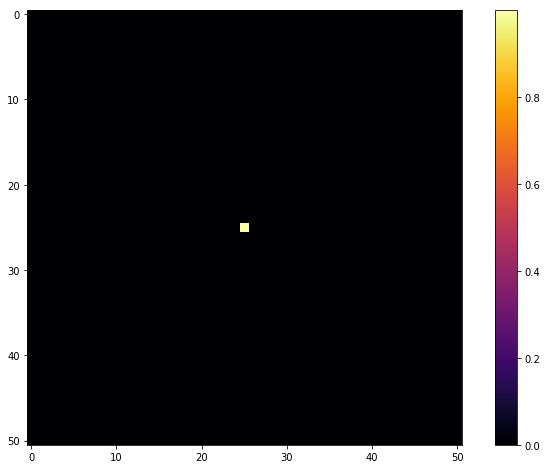

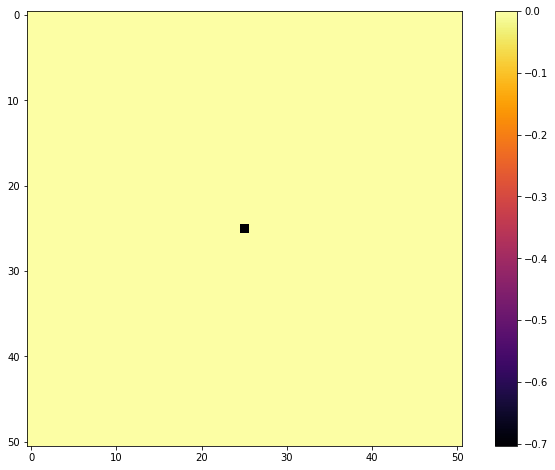

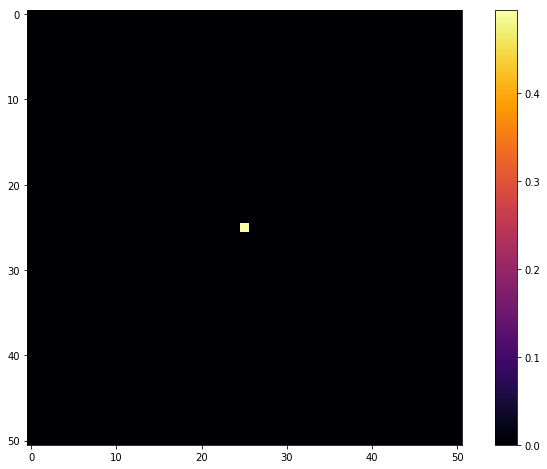

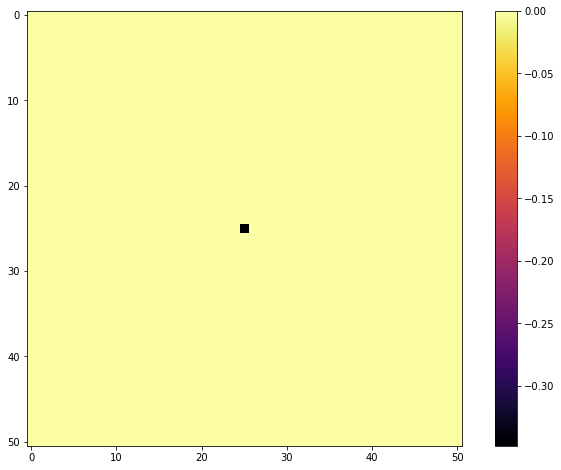

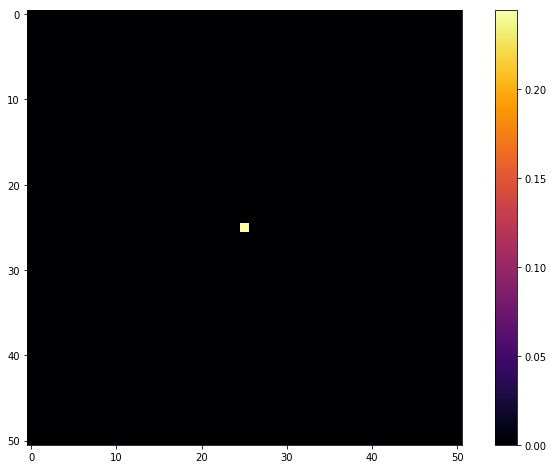

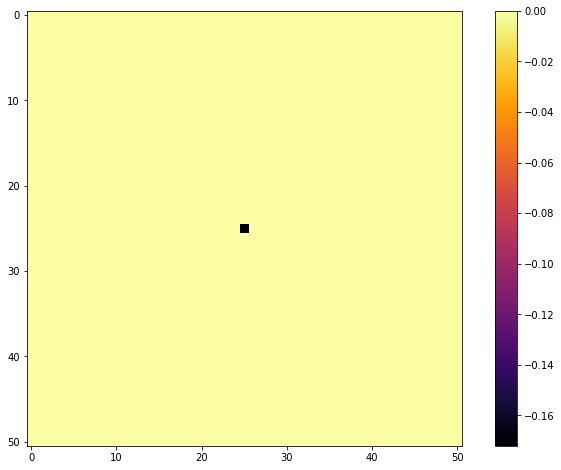

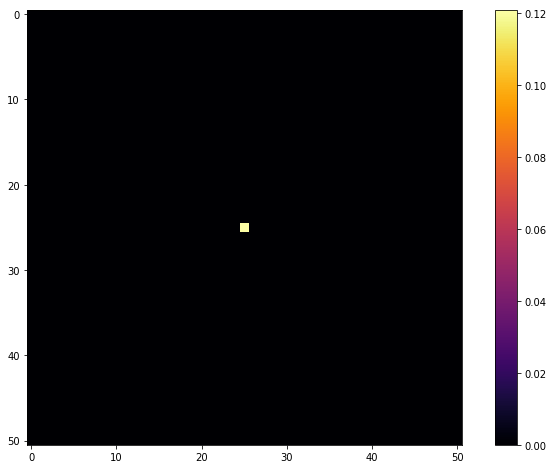

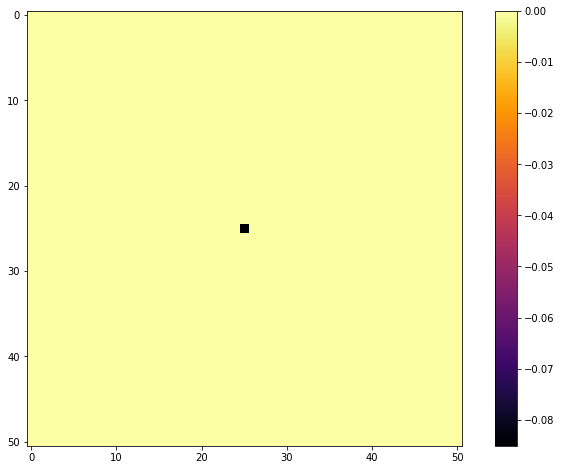

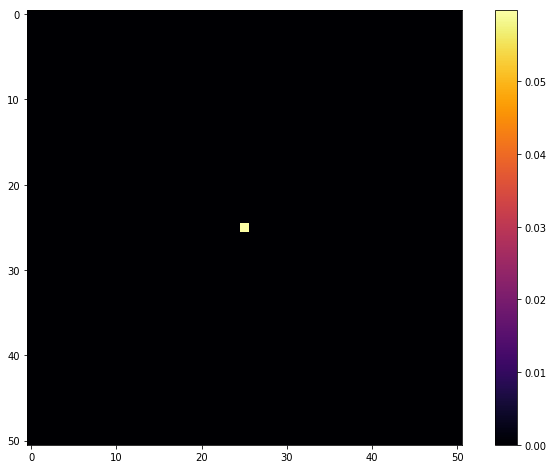

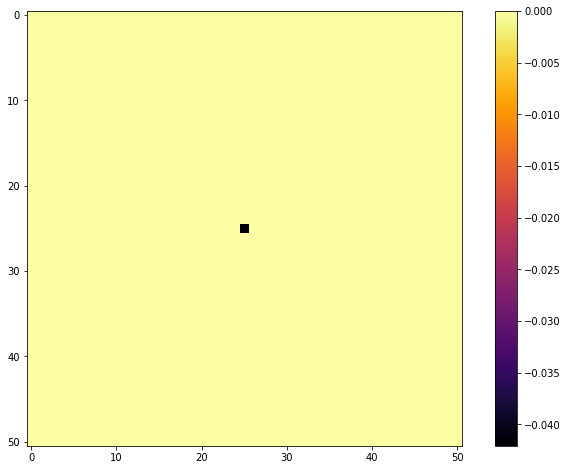

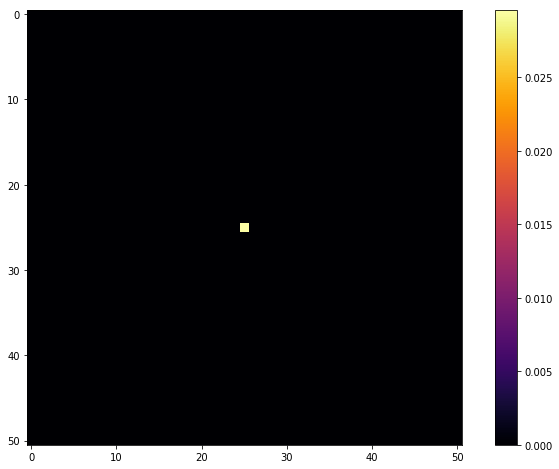

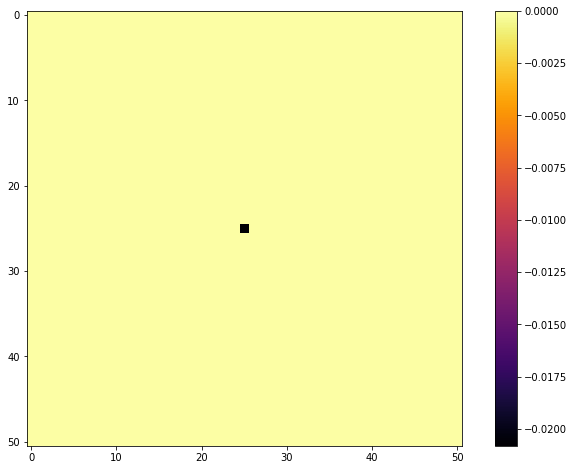

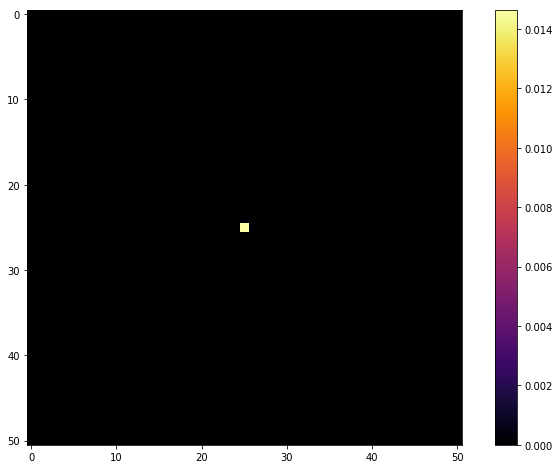

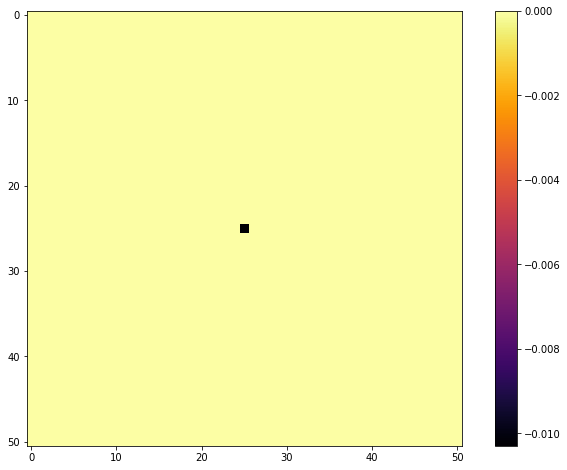

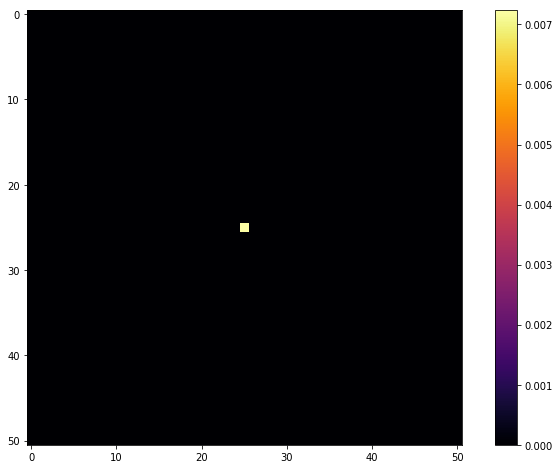

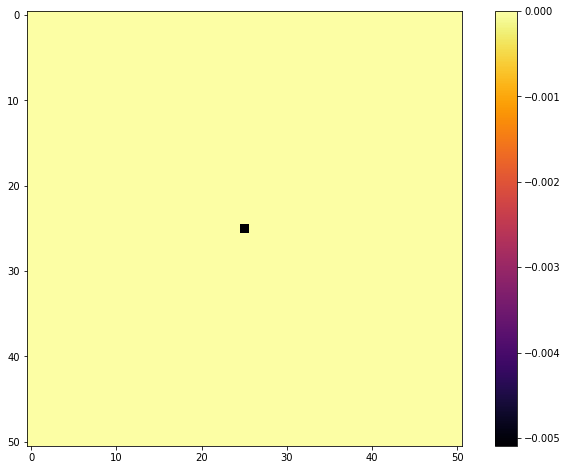

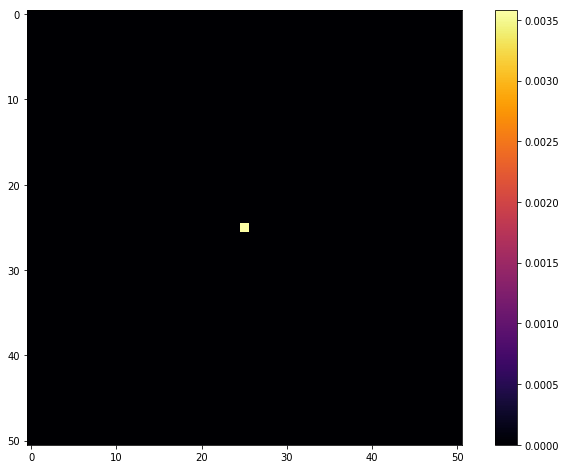

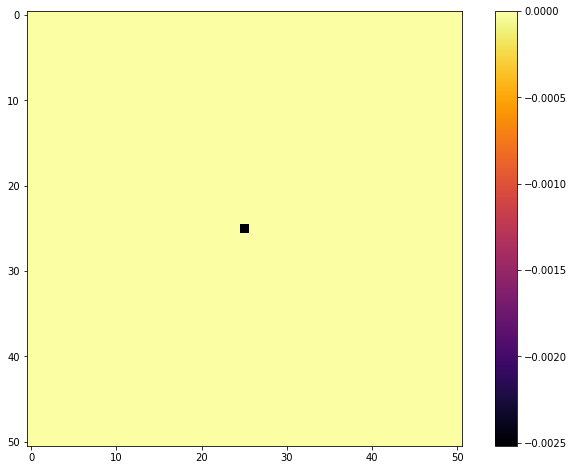

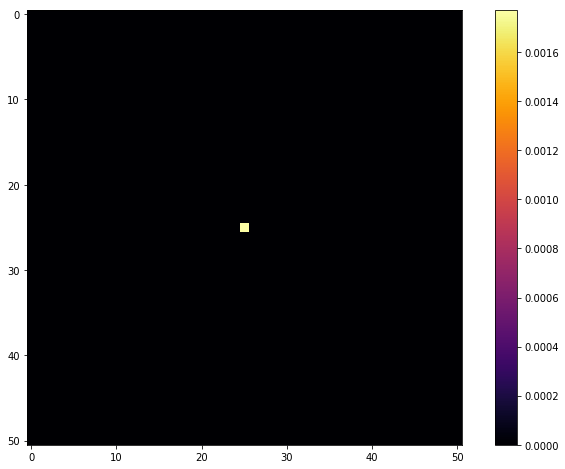

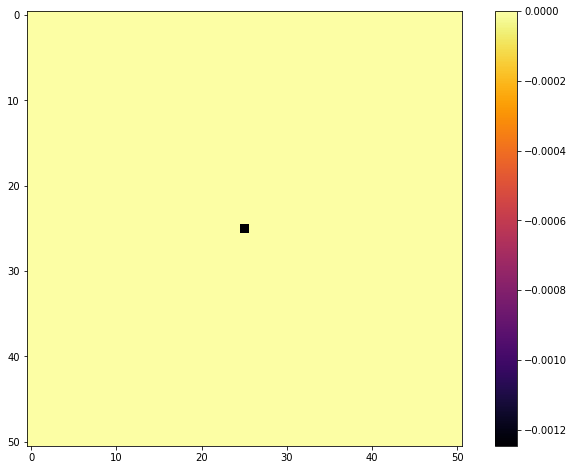

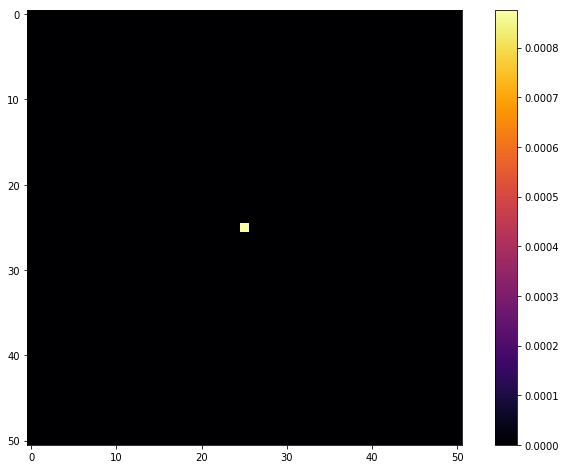

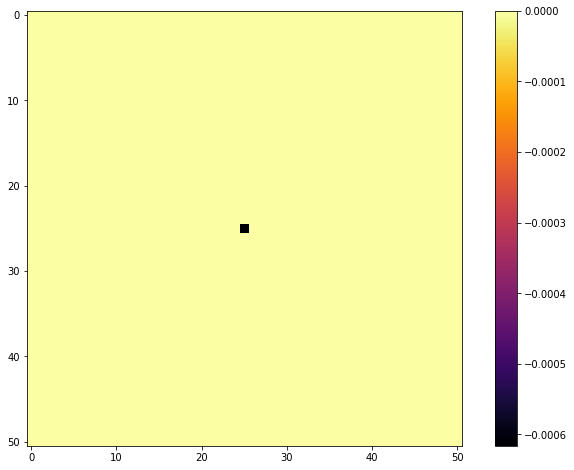

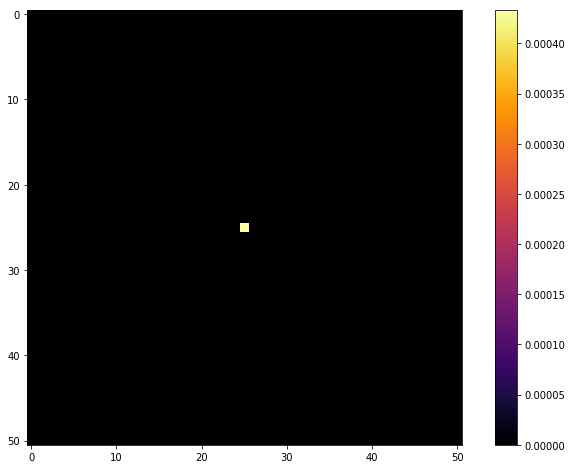

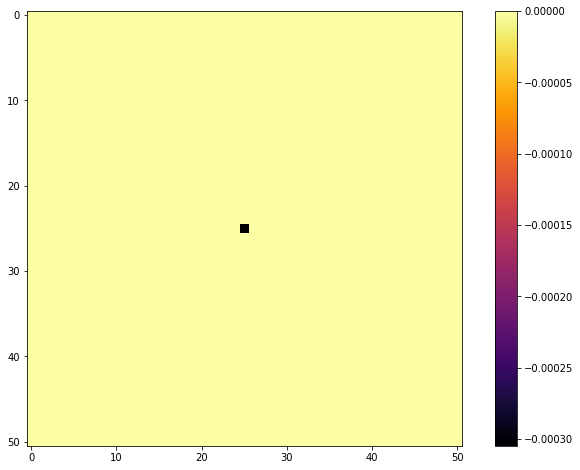

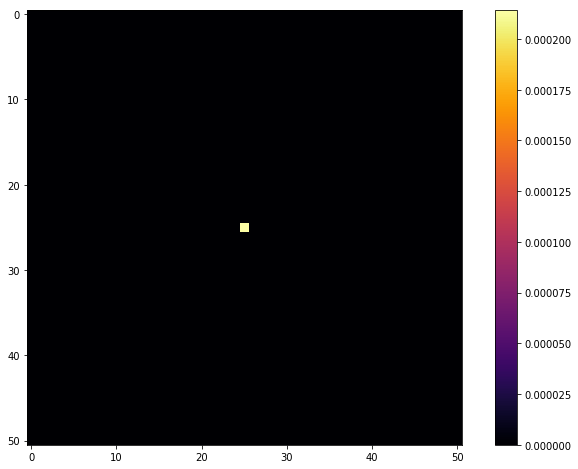

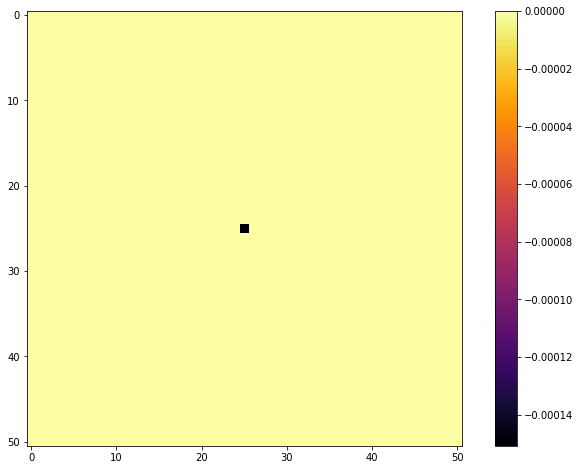

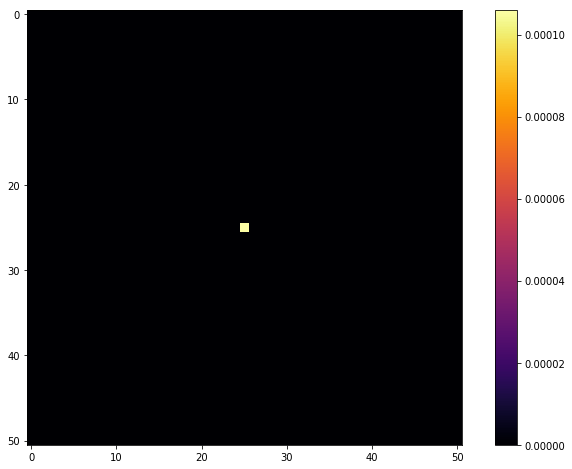

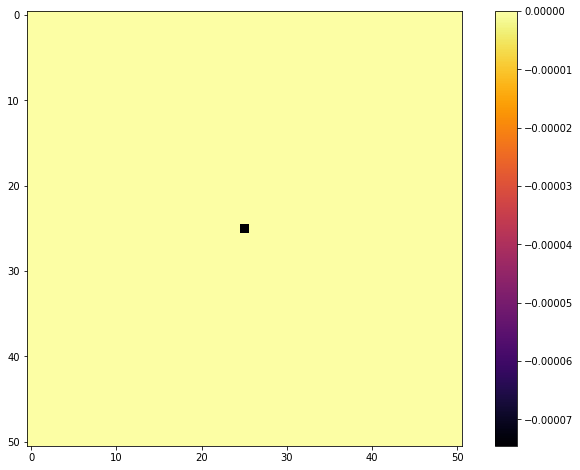

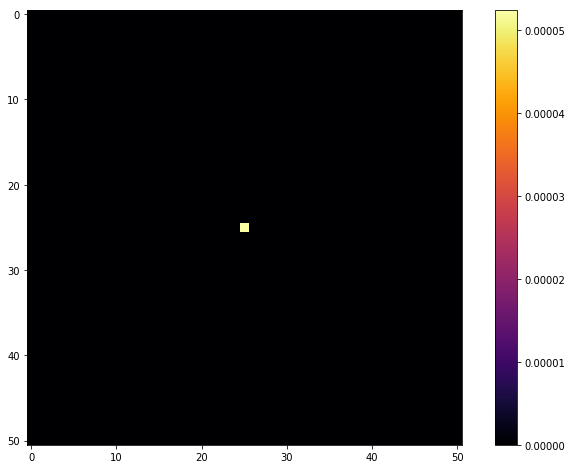

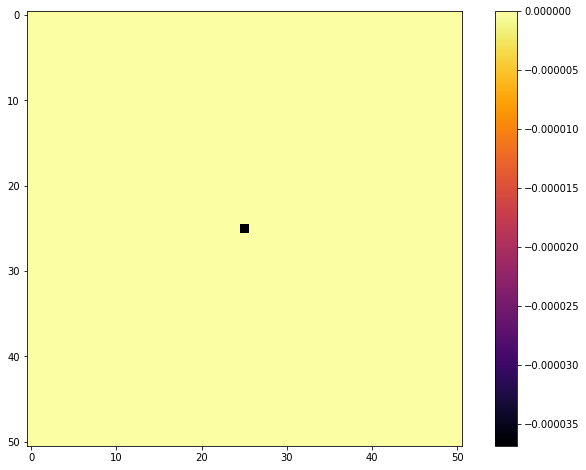

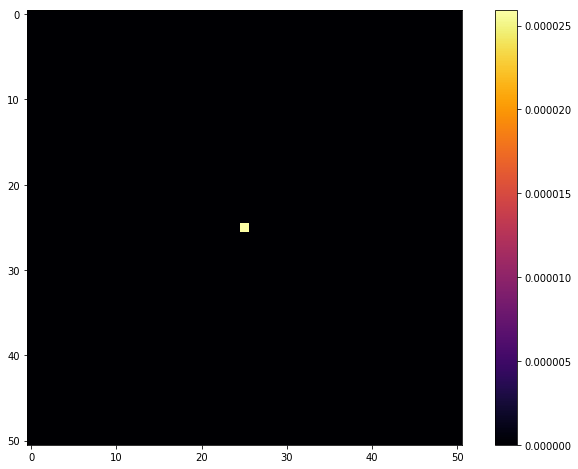

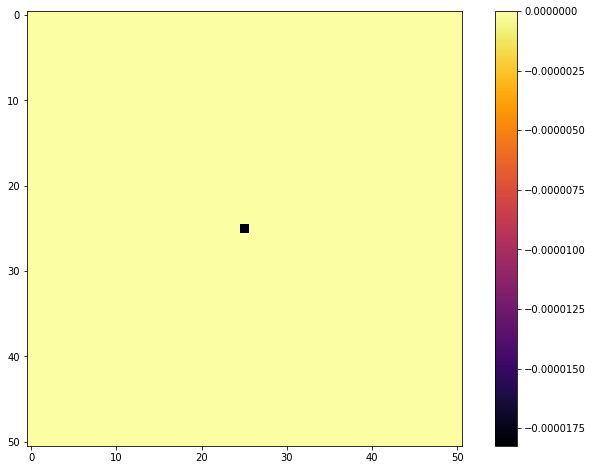

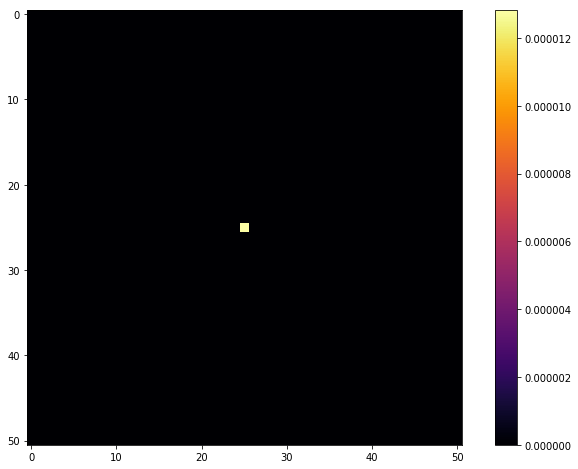

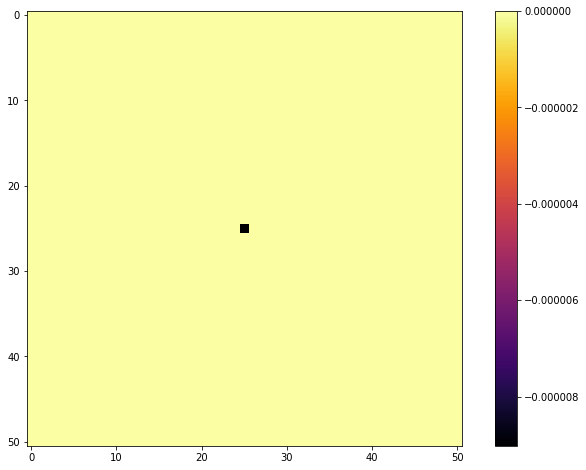

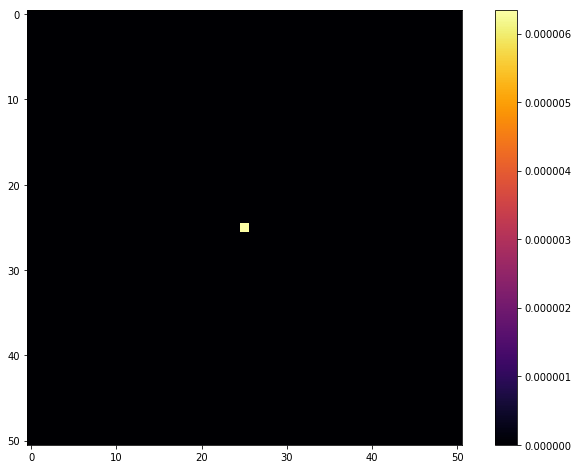

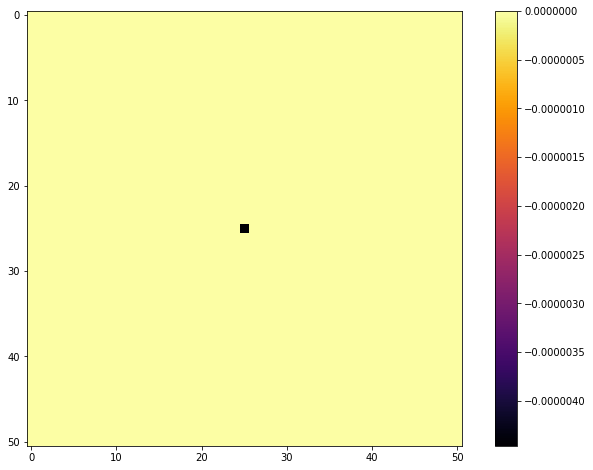

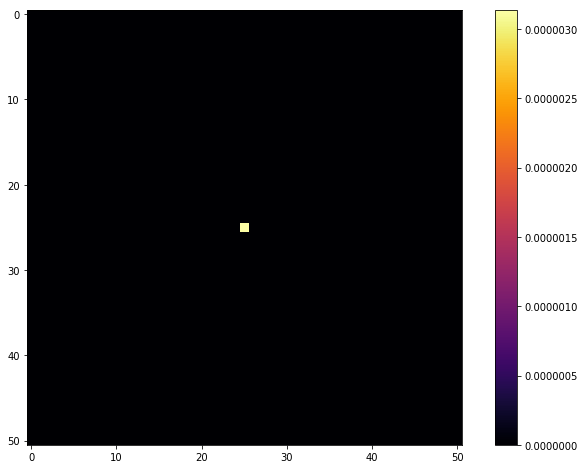

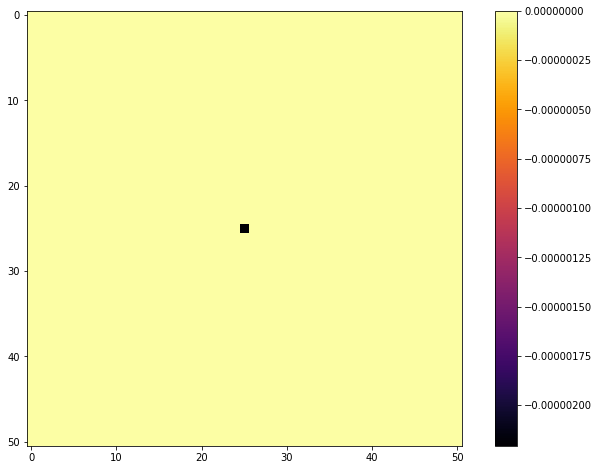

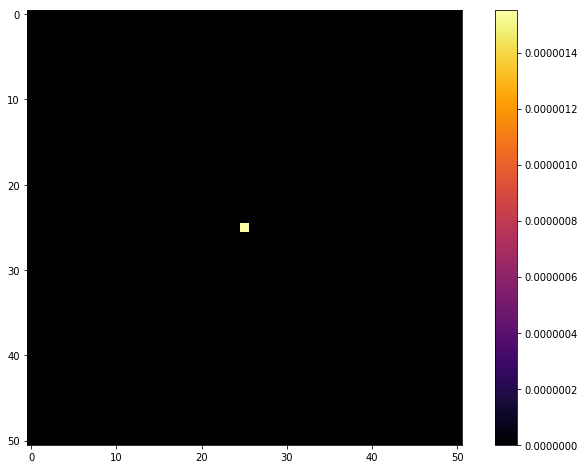

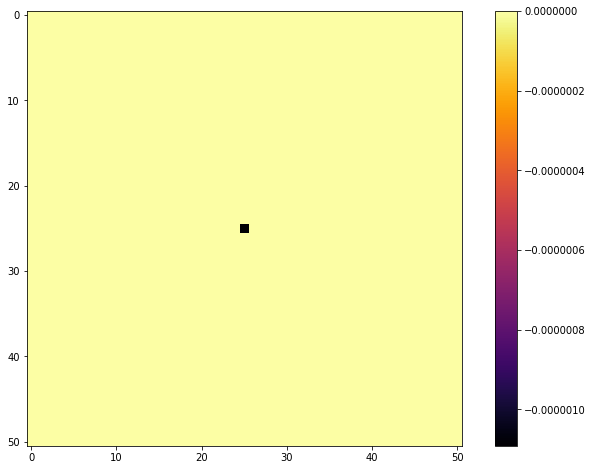

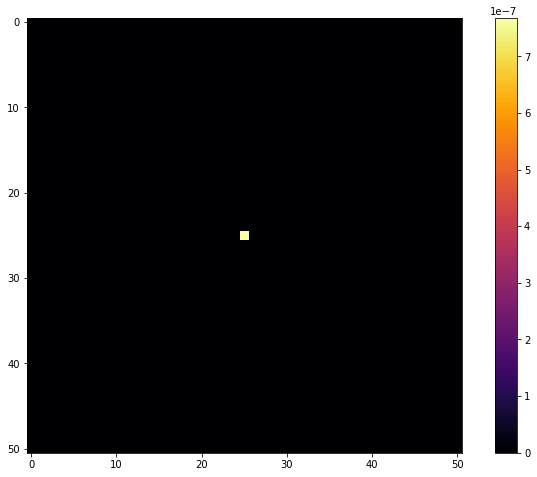

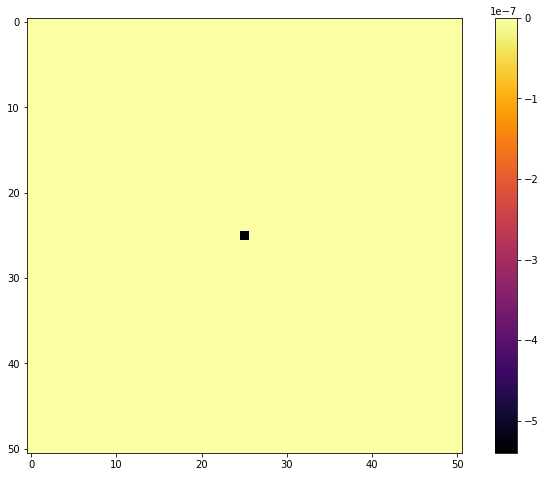

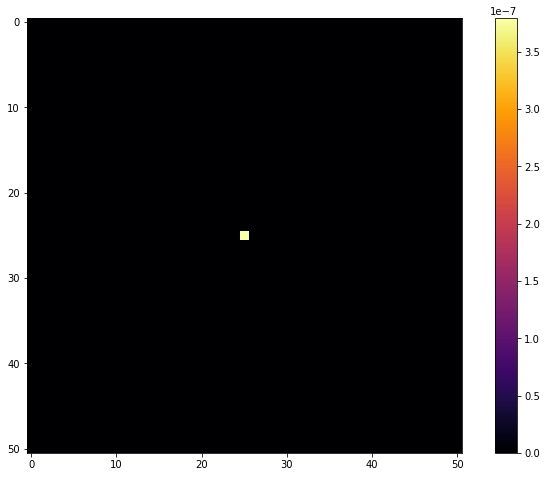

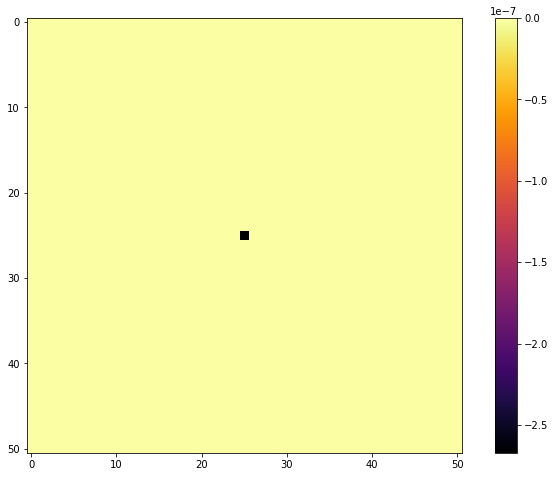

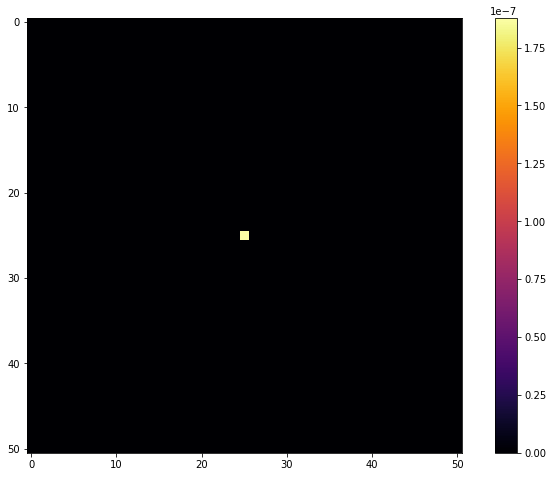

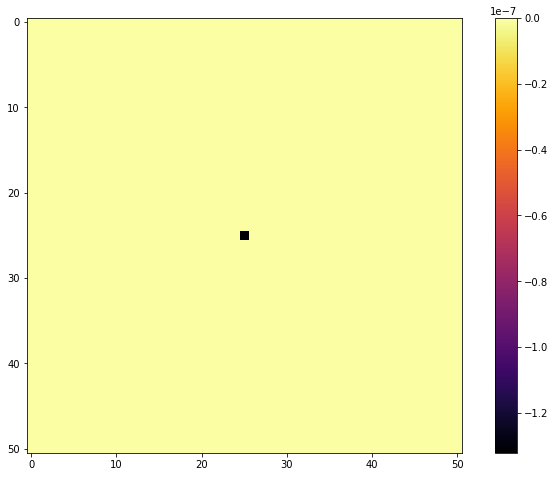

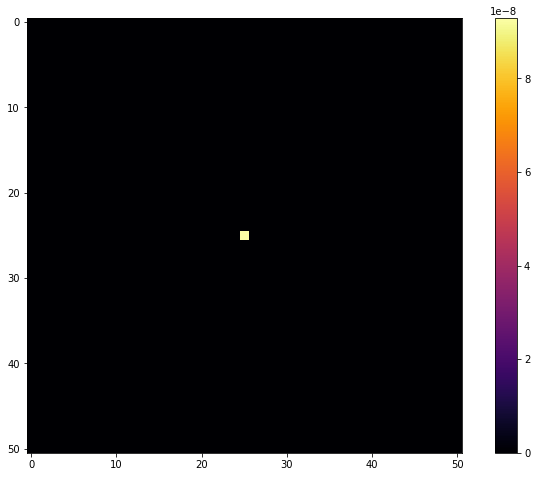

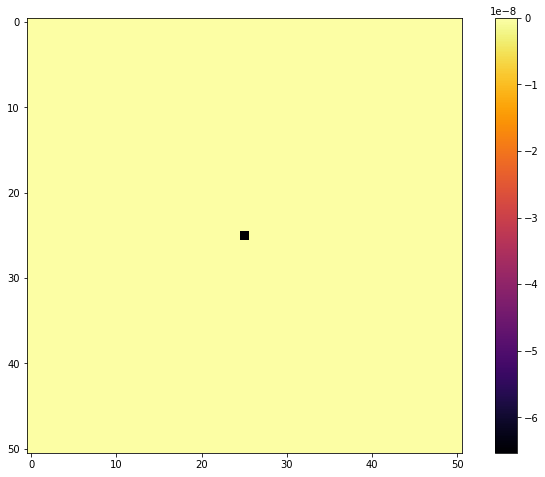

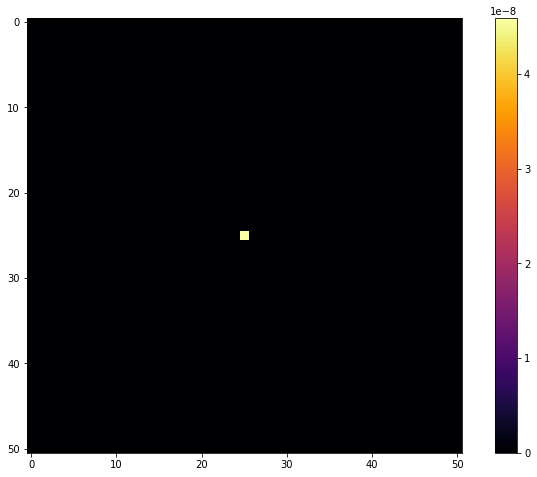

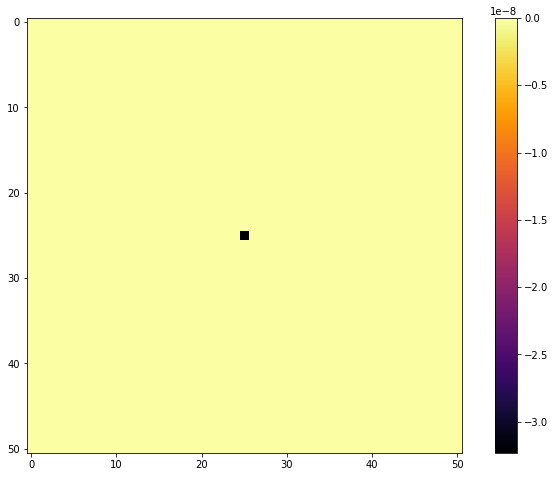

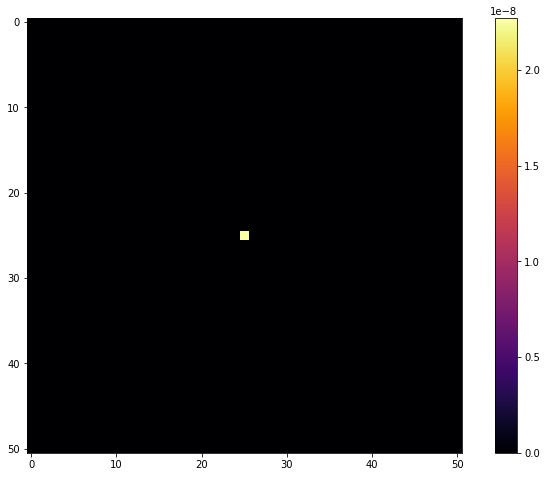

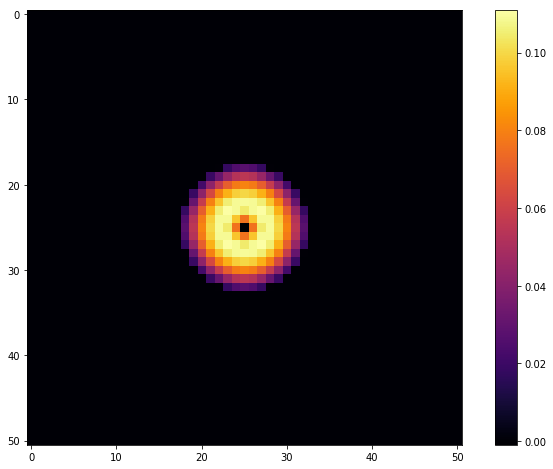

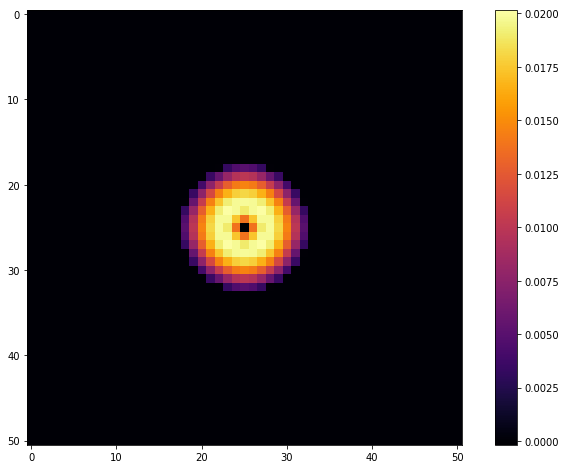

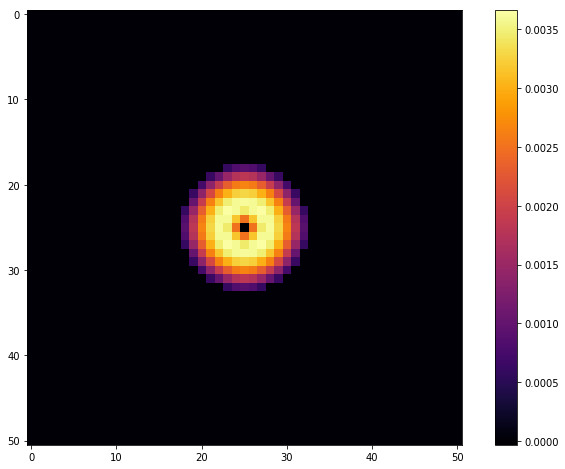

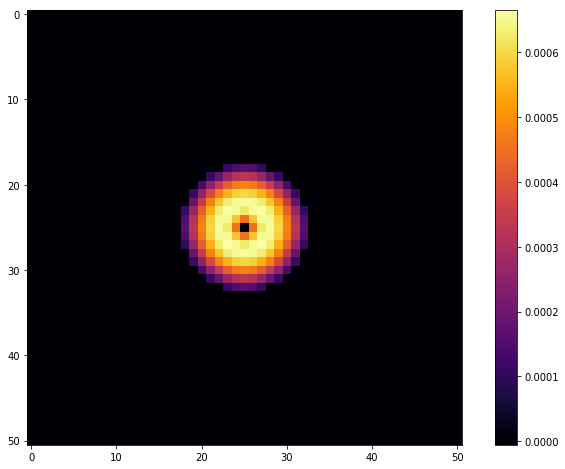

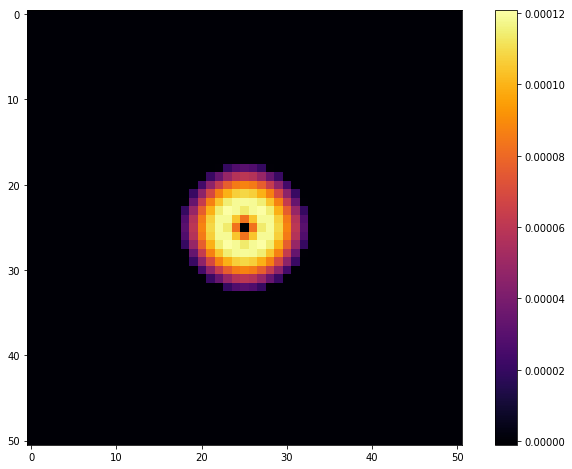

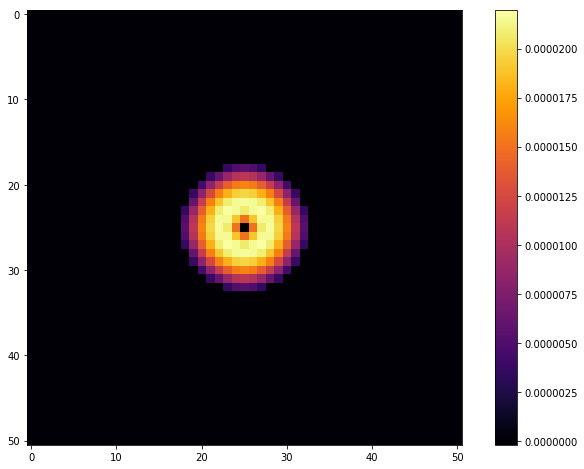

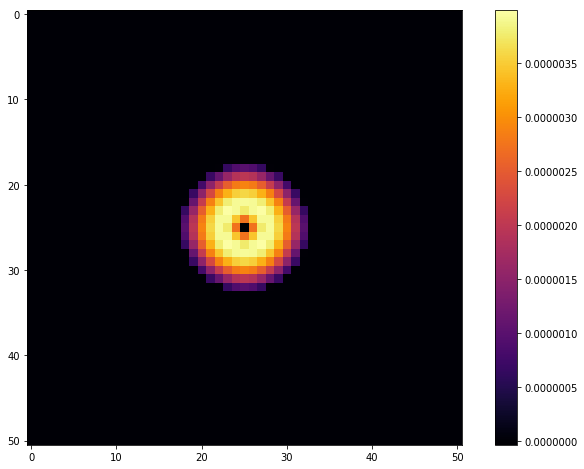

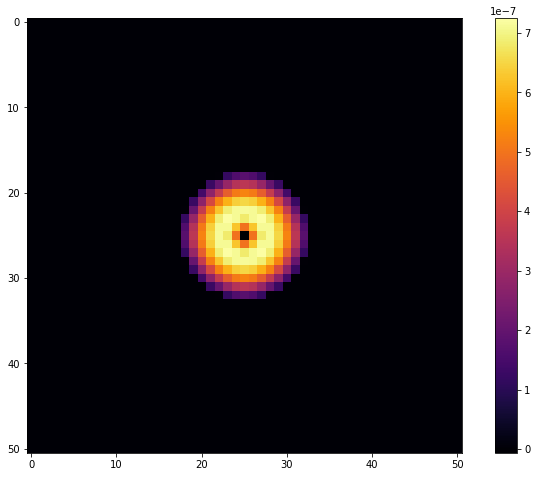

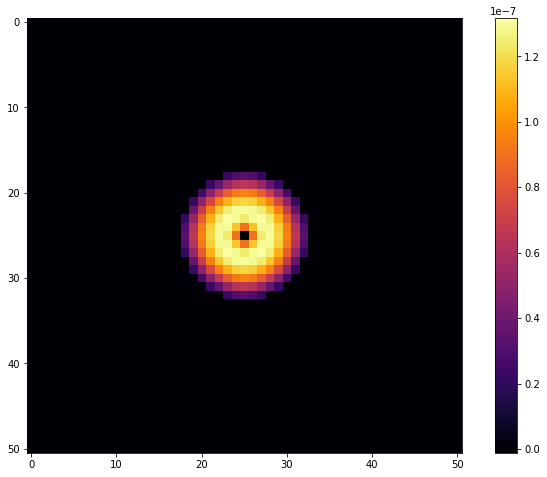

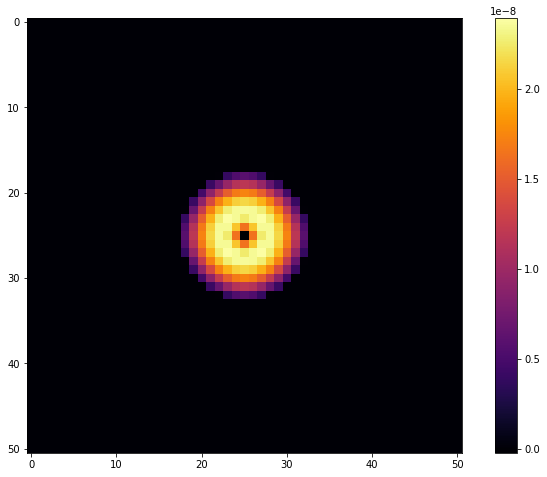

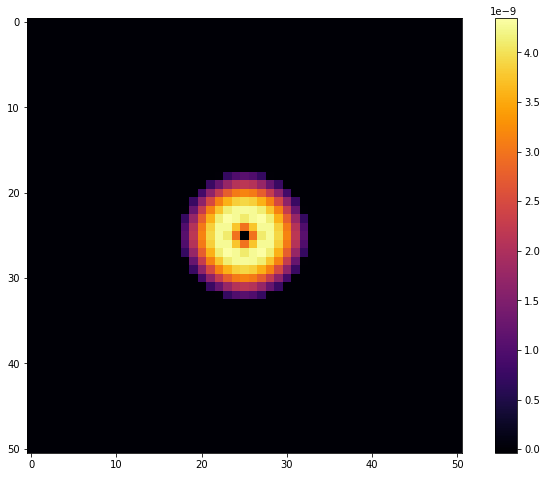

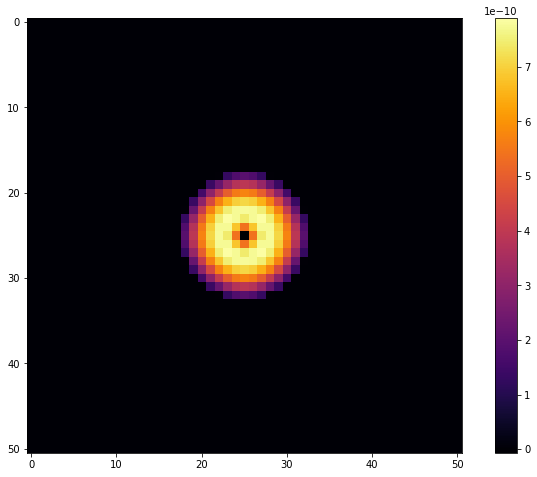

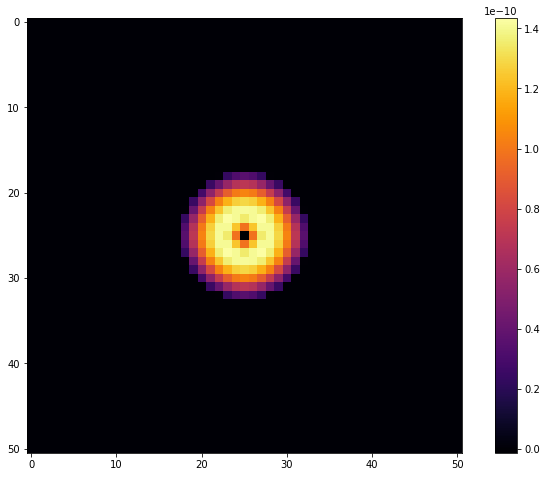

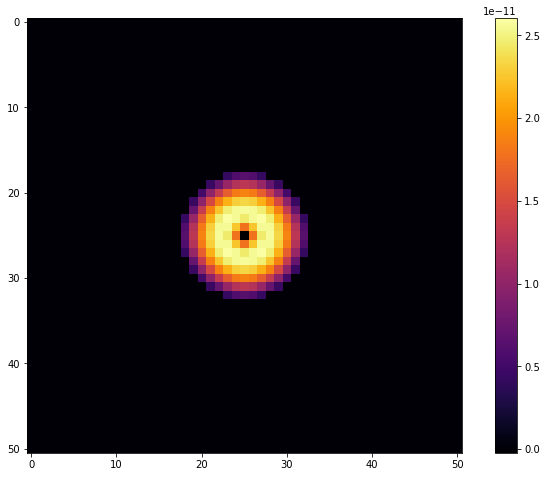

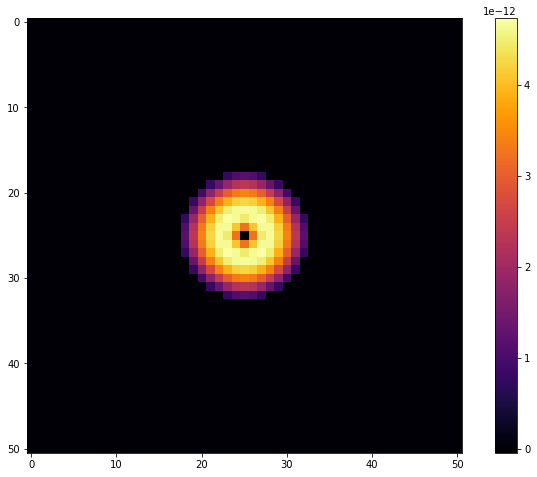

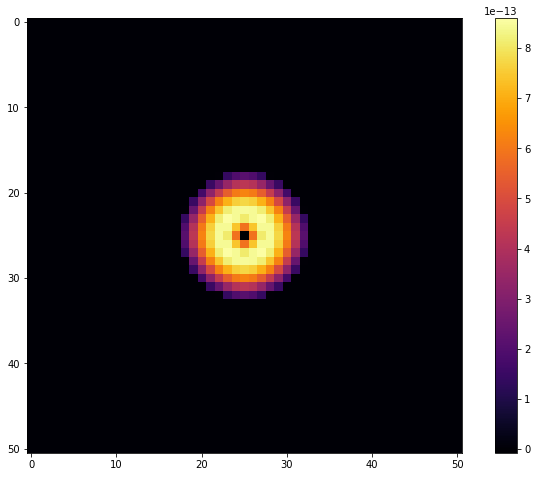

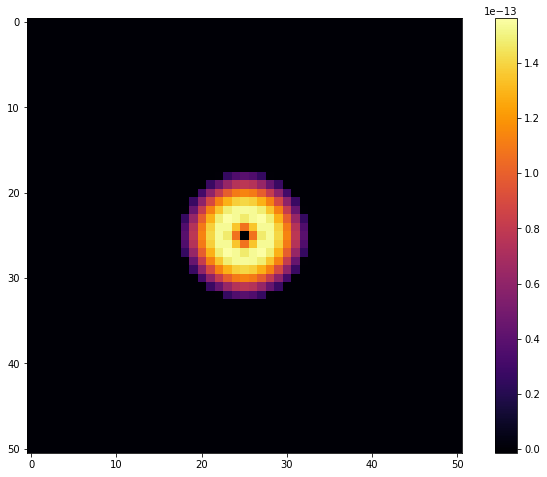

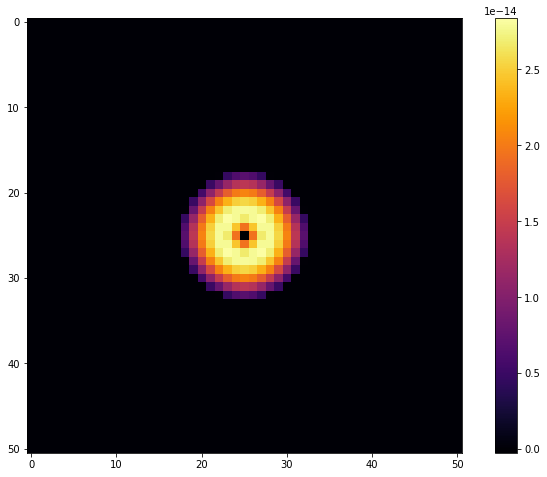

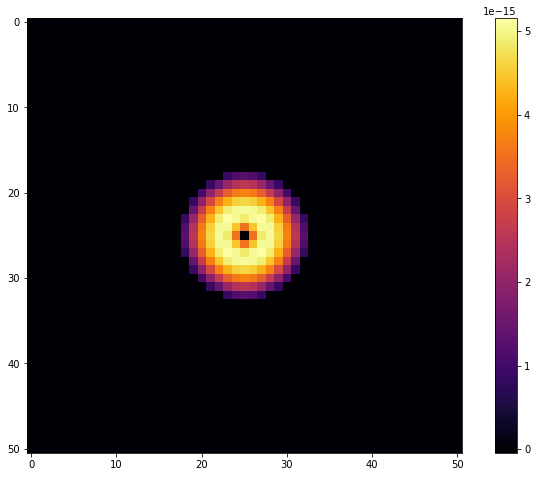

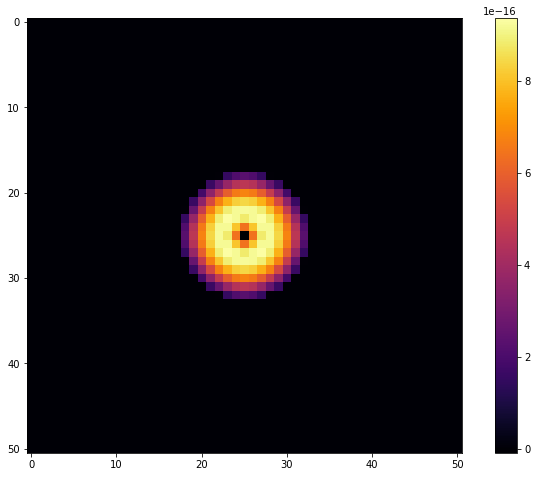

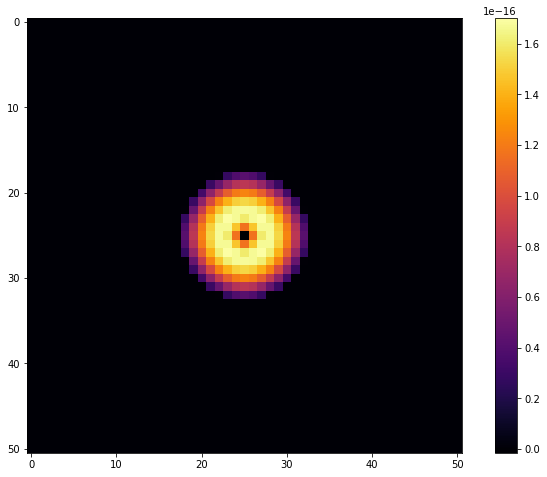

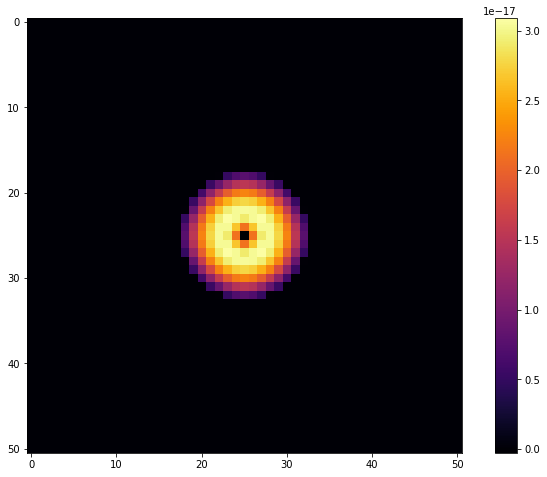

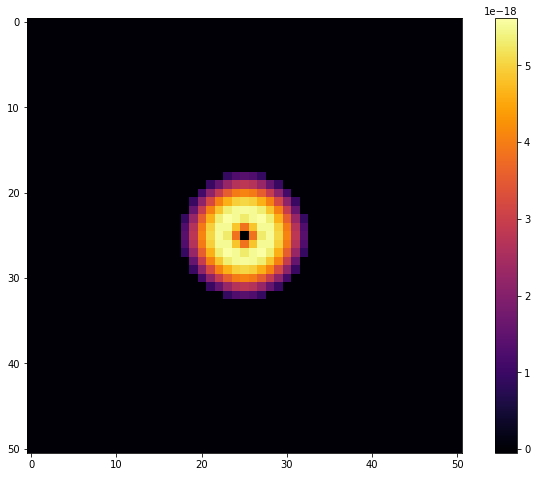

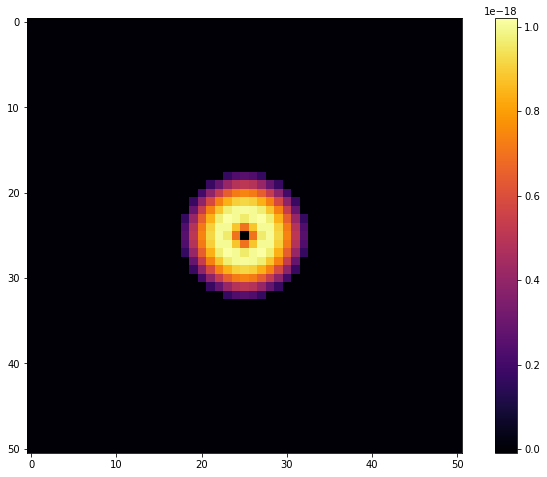

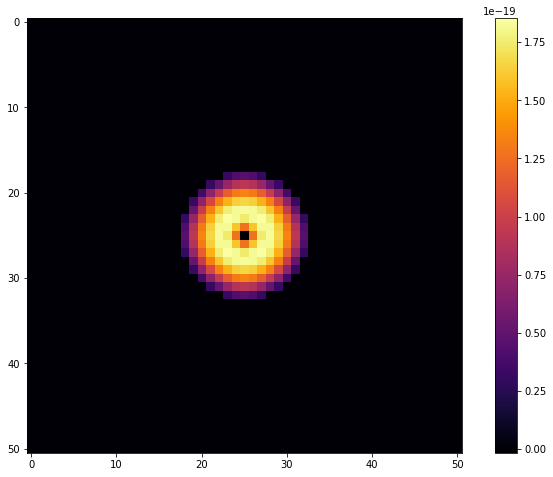

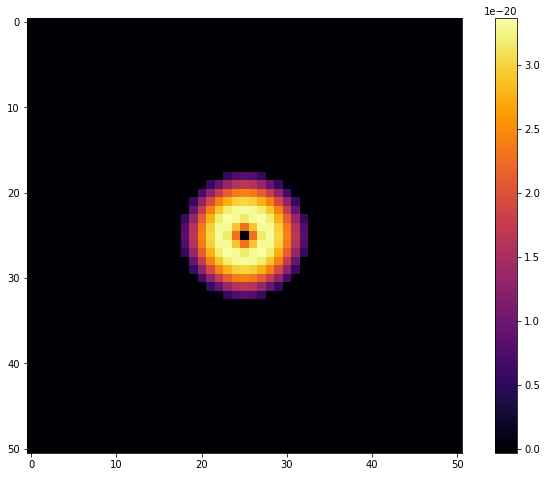

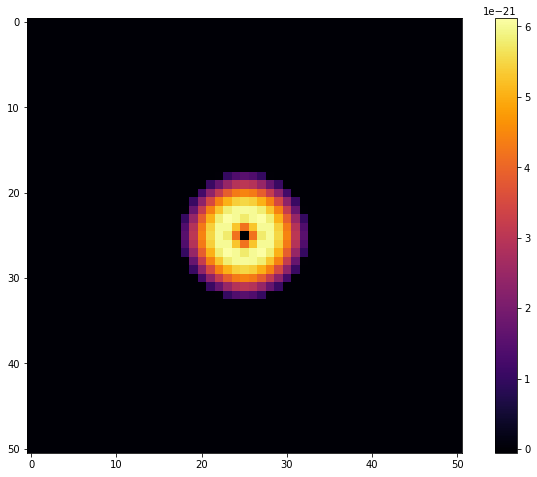

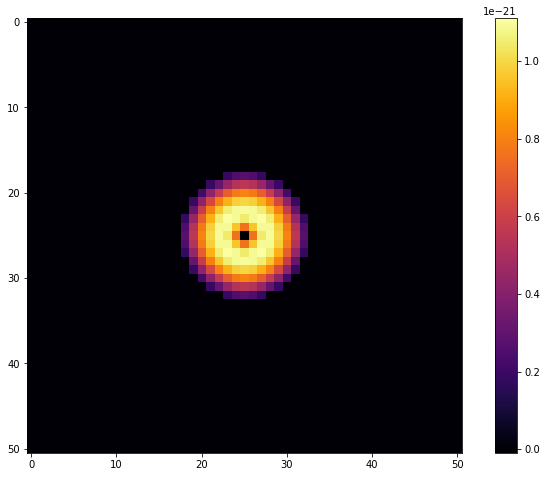

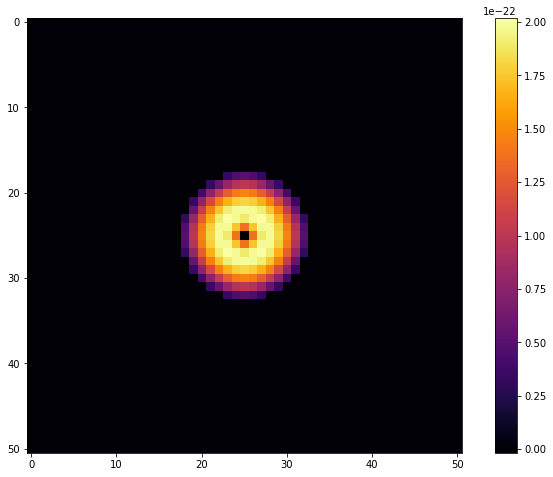

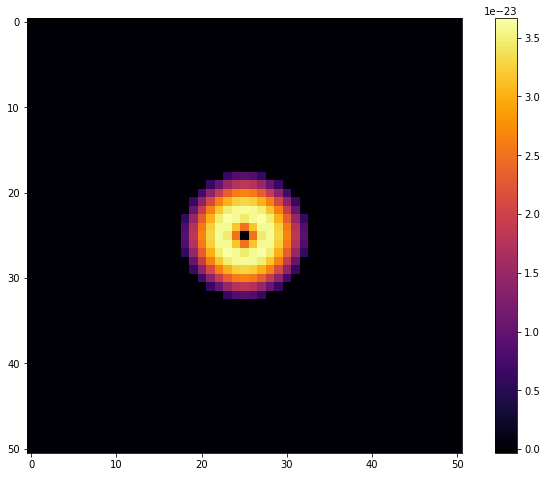

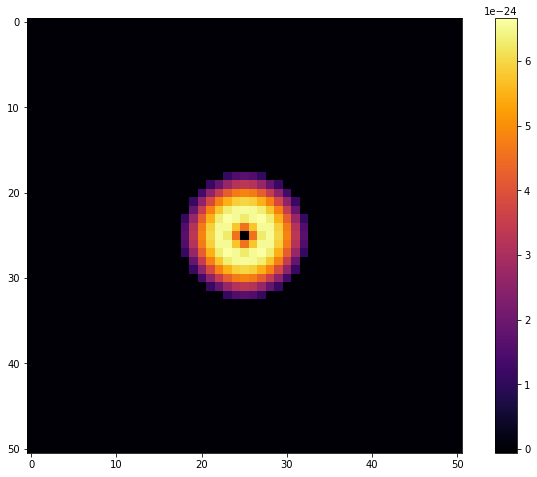

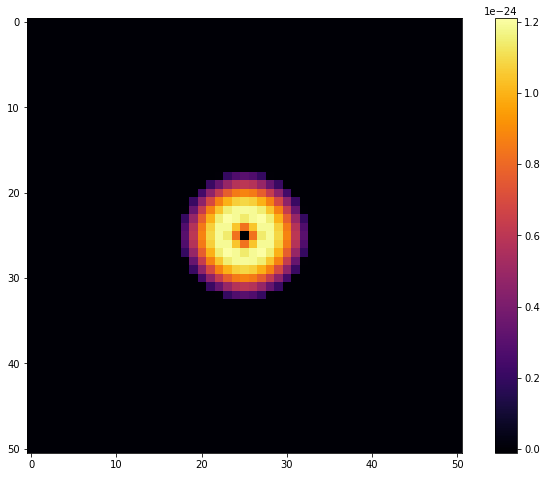

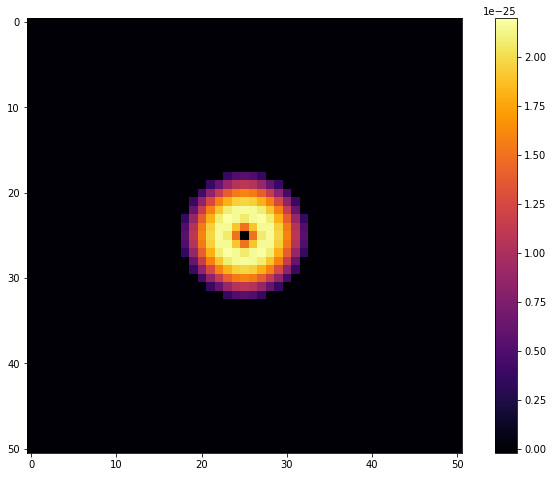

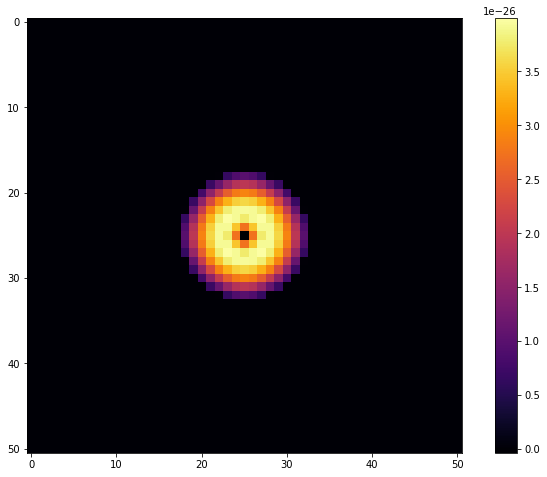

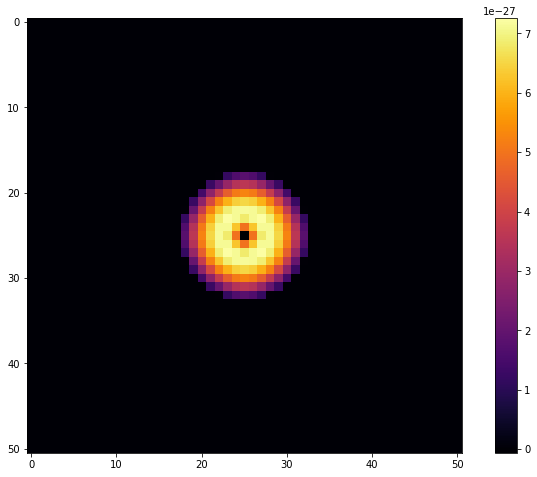

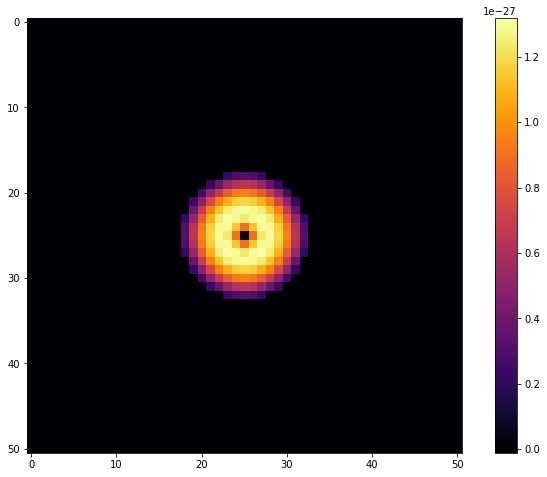

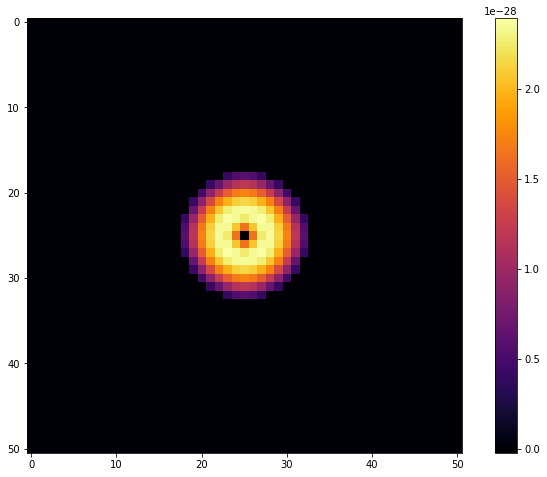

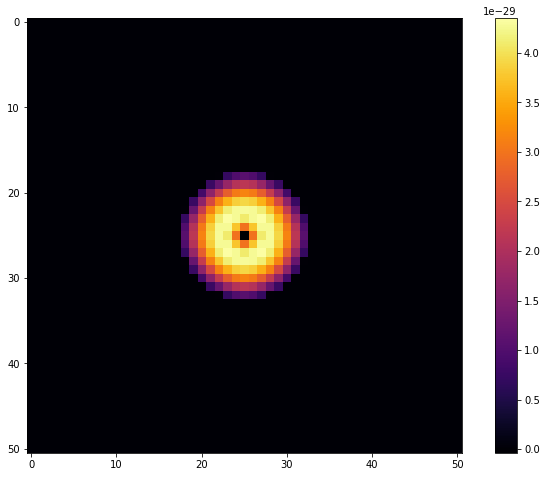

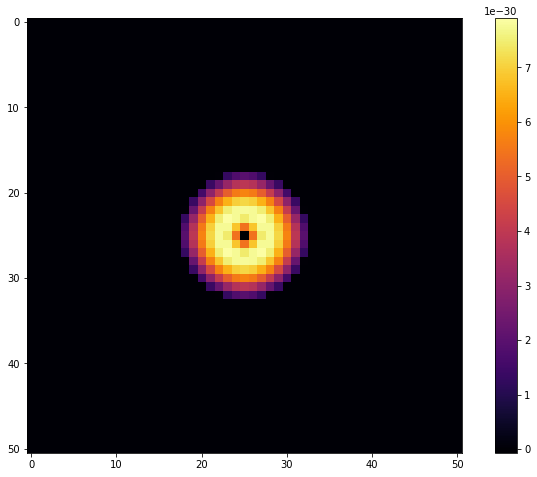

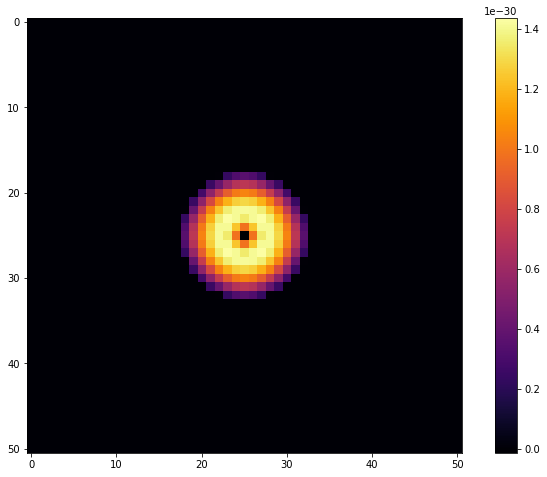

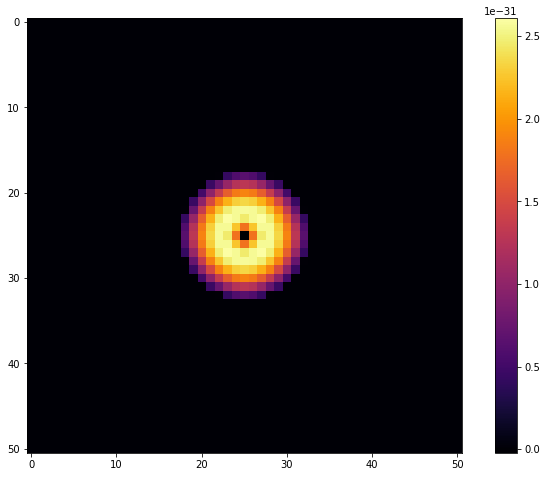

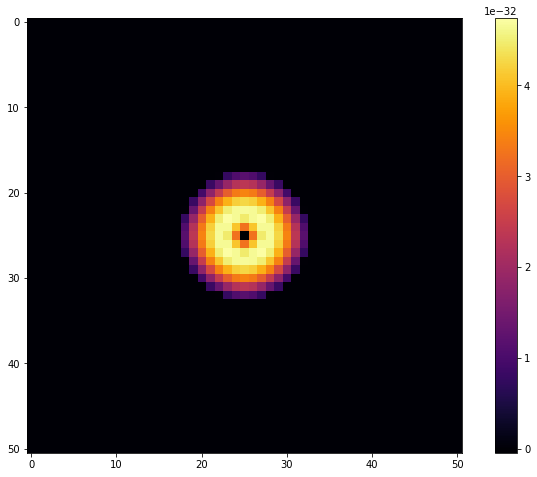

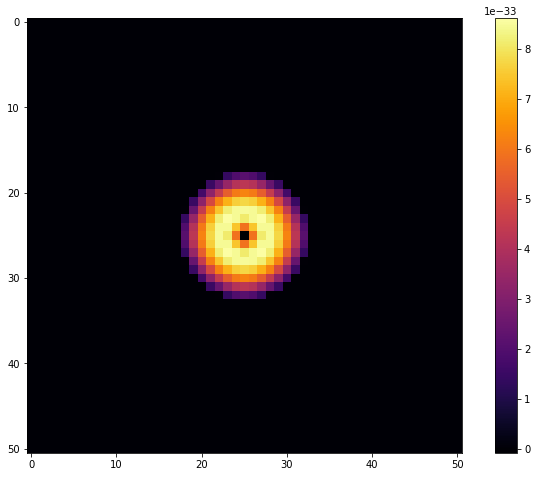

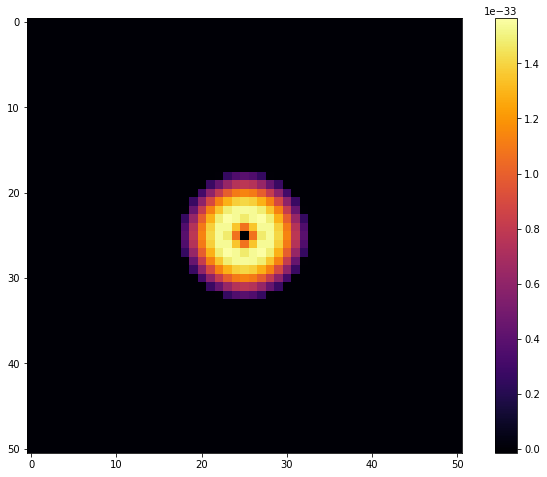

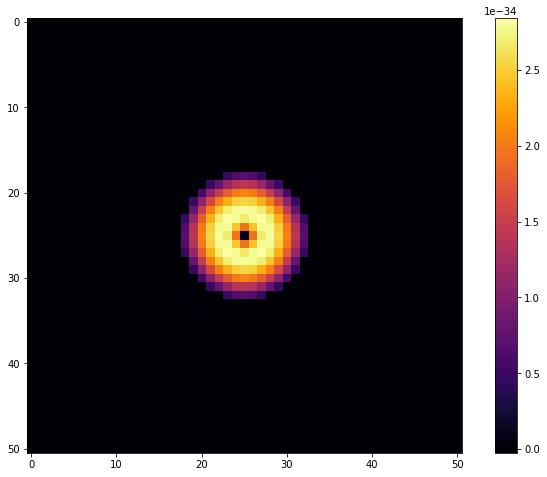

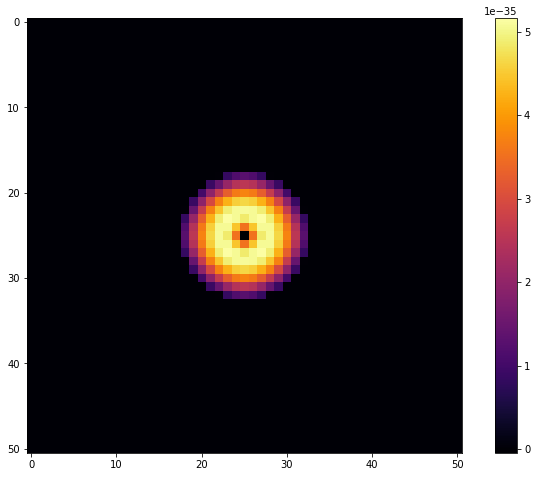

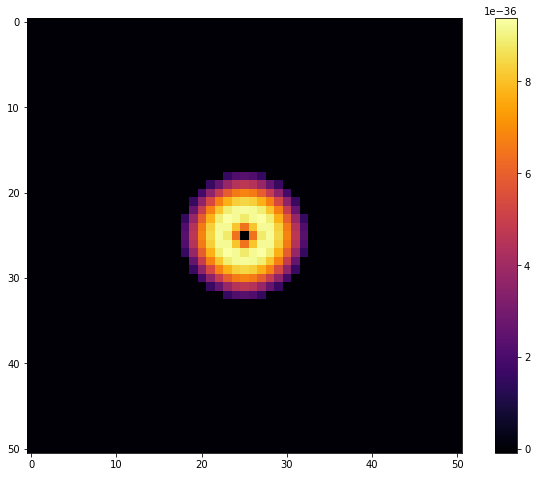

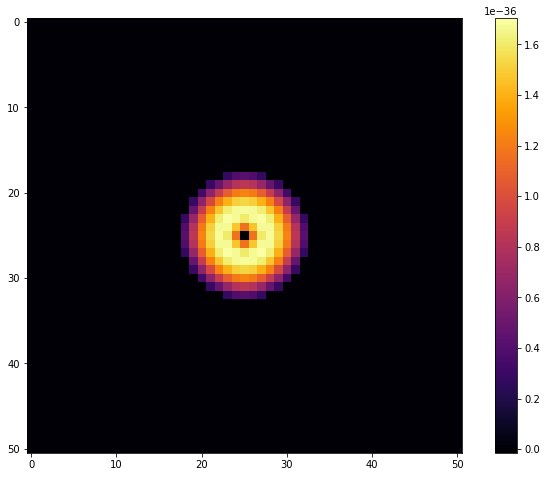

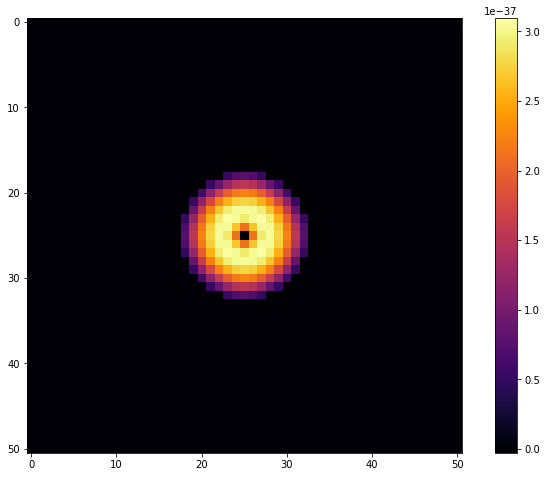

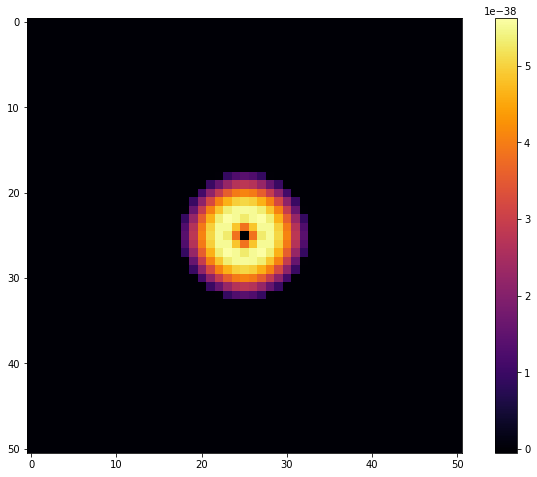

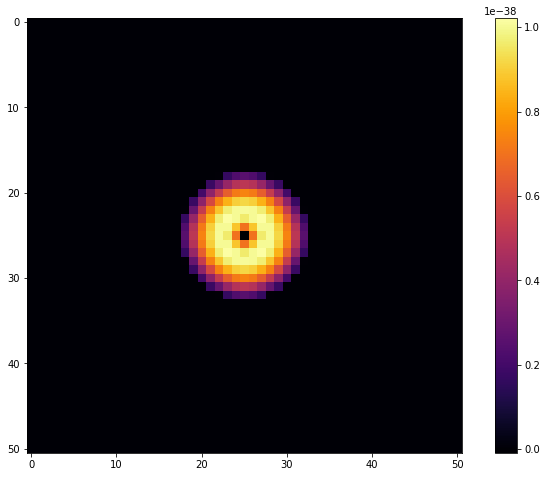

In [41]:
modeProfiles = []
for i in range(k):
    modeProfile = modeProfile3D(eigenvectors[:,i].reshape(N,N),eigenvalues[i], N, h)
    for i in range(N):
        fig = plt.figure(figsize=(12,8))
        plt.imshow(modeProfile[i,:,:], cmap="inferno")
        plt.colorbar()
    modeProfiles.append(modeProfile)